In [2]:
#鐵達尼資料範例
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [7]:
titanic.groupby(['sex','class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [8]:
#樞紐分析表語法
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [11]:
age = pd.cut(titanic['age'], [0, 18, 80])   #分範圍
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [12]:
fare = pd.qcut(titanic['fare'], 2)   #pd.qcut自動進行分位數
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])


fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [ ]:
#樞紐語法可呼叫參數
DataFrame.pivot_table(data, values=None, index=None, columns=None,
                      aggfunc='mean', fill_value=None, margins=False,
                      dropna=True, margins_name='All')


In [13]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [14]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)   #margins可計算總數

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


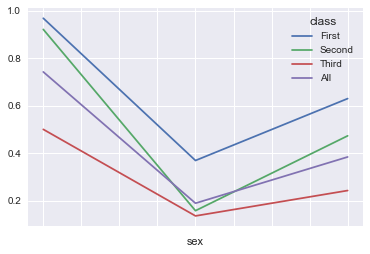

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()
titanic.pivot_table('survived', index='sex', columns='class', margins=True).plot()
plt.show()

In [17]:
#向量化字串
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
names = pd.Series(data)
print(names)
print(names.str.capitalize())

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object
0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object


In [19]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [20]:
monte.str.extract('([A-Za-z]+)')

/Users/milse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

In [28]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [30]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
print(full_monte)
print(full_monte['info'].str.get_dummies('|'))

    info            name
0  B|C|D  Graham Chapman
1    B|D     John Cleese
2    A|C   Terry Gilliam
3    B|D       Eric Idle
4    B|C     Terry Jones
5  B|C|D   Michael Palin
   A  B  C  D
0  0  1  1  1
1  0  1  0  1
2  1  0  1  0
3  0  1  0  1
4  0  1  1  0
5  0  1  1  1


In [40]:
#時間系列語法
date = pd.to_datetime("5th of July, 2015")
print(date)
print(date.strftime('%A'))

2015-07-05 00:00:00
Sunday


In [41]:
date + pd.to_timedelta(np.arange(12), 'D')   #時間向量化操作

DatetimeIndex(['2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12',
               '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16'],
              dtype='datetime64[ns]', freq=None)

In [45]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
print(data)
print(data['2014-07-04':'2015-07-04'])

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64
2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64


In [46]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [47]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [48]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [49]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [50]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [54]:
#西雅圖自行車數量資料範例
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1433k    0 1433k    0     0   183k      0 --:--:--  0:00:07 --:--:--  267k191k    0     0  61479      0 --:--:--  0:00:03 --:--:-- 61460


In [57]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)   #日期解析
data.head().unstack()

                              Date               
Fremont Bridge East Sidewalk  2012-10-03 00:00:00    9.0
                              2012-10-03 01:00:00    6.0
                              2012-10-03 02:00:00    1.0
                              2012-10-03 03:00:00    3.0
                              2012-10-03 04:00:00    1.0
Fremont Bridge West Sidewalk  2012-10-03 00:00:00    4.0
                              2012-10-03 01:00:00    4.0
                              2012-10-03 02:00:00    1.0
                              2012-10-03 03:00:00    2.0
                              2012-10-03 04:00:00    6.0
dtype: float64

In [58]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')   #將東西側相加,產生一個Total欄位

In [60]:
data.dropna().describe()

,West,East,Total
count,51063.000000,51063.000000,51063.000000
mean,57.126902,53.654329,110.781231
std,82.685731,70.067851,139.511157
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,29.000000,60.000000
75%,70.000000,71.000000,145.000000
max,717.000000,698.000000,957.000000


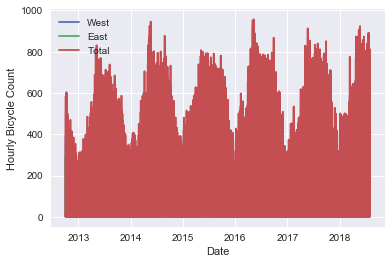

In [61]:
%matplotlib inline
import seaborn; seaborn.set()
data.plot()
plt.ylabel('Hourly Bicycle Count');

Text(0,0.5,'Weekly bicycle count')

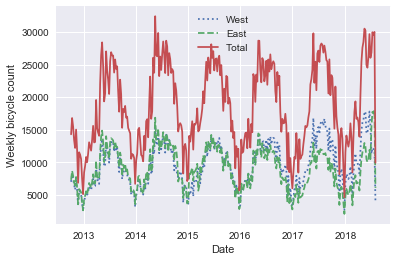

In [62]:
weekly = data.resample('W').sum()   #以星期為單位
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')

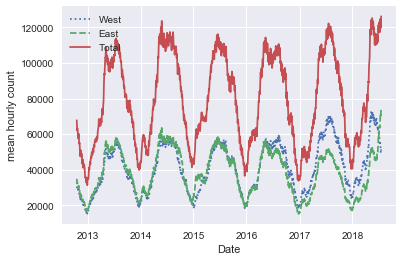

In [63]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])   #30天滾動平均
plt.ylabel('mean hourly count');

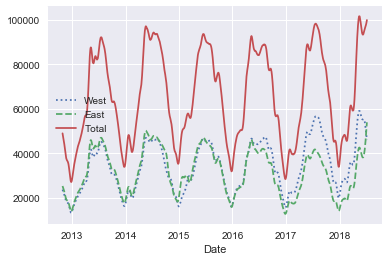

In [64]:
#高斯窗口平滑呈現
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])   #窗口寬度設為50天,高斯寬度10天

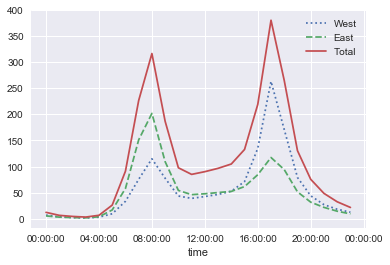

In [68]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(7)   #每四小時為一區間,產生７個區間
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

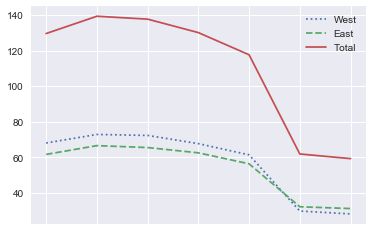

In [69]:
by_weekday = data.groupby(data.index.dayofweek).mean()   #一週平均
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

In [75]:
#DataFrame.eval()
rng = np.random.RandomState(42)
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
result1 = df.eval('(A + B) / (C - 1)')
print(df.head())
print(result1.head())


          A         B         C
0  0.374540  0.950714  0.731994
1  0.598658  0.156019  0.155995
2  0.058084  0.866176  0.601115
3  0.708073  0.020584  0.969910
4  0.832443  0.212339  0.181825
0    -4.944867
1    -0.894161
2    -2.317108
3   -24.215802
4    -1.276966
dtype: float64
